In [26]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [27]:
original_waypoints = np.loadtxt('race1_1_0.7.csv', delimiter=',')
lobby_map = cv2.imread('../map/race_1.pgm', cv2.IMREAD_GRAYSCALE)


In [28]:
print(original_waypoints[0])

[  2.5578741   4.7533902   1.7830363 -11.259603    1.032355   -0.0532878]


In [29]:
resolution = 0.05
origin = [-8.99, -1.15]

In [30]:
segment_points = [
    # x, y, vel, lookahead, p, d
    [-5.96, 0.515, 3.0, 0.5, 0.3, 0.1],
    [-4.5, -0.3, 5.0, 1.0, 0.3, 0.1],
    [0.654, -0.63, 5.0, 0.8, 0.3, 0.1],
    [4.0, 2.0, 2.0, 0.5, 0.3, 0.1], # haripin 1
    [2.0, 4.0, 3.0, 0.5, 0.3, 0.1],
    [0.74, 2.84, 5.0, 1.5, 0.3, 0.1],
    [-3.36, 2.59, 2.0, 0.5, 0.3, 0.1] # hairpin 2
    ]
segment_points = np.array(segment_points)

(-9.62999939918518, 6.650000810623169, -1.5650000631809236, 8.665000802278518)

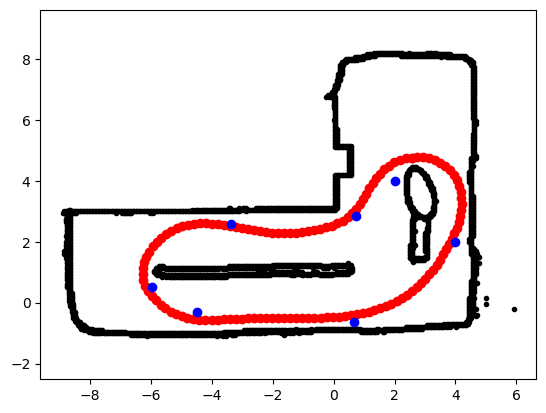

In [31]:
blackpts = np.argwhere(lobby_map <= 40).astype(np.float32)
blackpts[:, 0] = (lobby_map.shape[0] - blackpts[:, 0]) * resolution + origin[1]
blackpts[:, 1] = blackpts[:, 1] * resolution + origin[0]
plt.plot(blackpts[:,1], blackpts[:,0], 'k.')
plt.plot(original_waypoints[:,0], original_waypoints[:,1], 'ro')
plt.plot(segment_points[:,0], segment_points[:,1], 'bo')
plt.axis('equal')

In [32]:
np.any(lobby_map == 254, axis=1).shape

(187,)

(-6.77959323, 4.72119123, -0.90116734, 5.06451414)

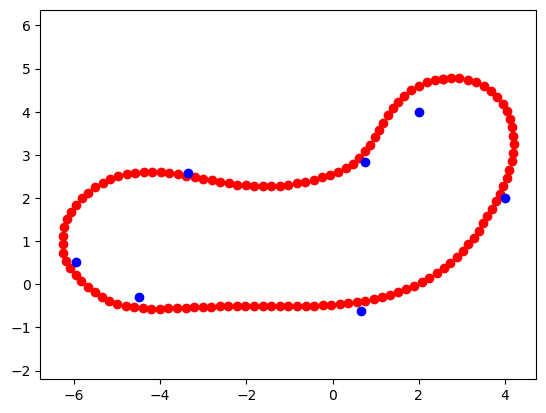

In [33]:
plt.plot(original_waypoints[:,0], original_waypoints[:,1], 'ro')
plt.plot(segment_points[:,0], segment_points[:,1], 'bo')
plt.axis('equal')

In [34]:
seg_start_idx = []
for i in range(segment_points.shape[0]):
    point = segment_points[i, :2]
    dist = np.linalg.norm(original_waypoints[:,:2] - point, axis=1)
    idx = np.argmin(dist)
    seg_start_idx.append(idx)
print(seg_start_idx)

[57, 66, 92, 114, 5, 14, 35]


In [35]:
# print(original_waypoints)
seg_waypoints = np.zeros((original_waypoints.shape[0], 7))
seg_waypoints[:, :3] = original_waypoints[:, [0, 1, 4]]
seg_start_idx.append(seg_start_idx[0])
for i in range(len(seg_start_idx)-1):
    if seg_start_idx[i] > seg_start_idx[i+1]:
        for j in range(seg_start_idx[i], original_waypoints.shape[0]):
            seg_waypoints[j, 3:6] = segment_points[i, 3:]
            seg_waypoints[j, 6] = i
        for j in range(seg_start_idx[i+1]):
            seg_waypoints[j, 3:6] = segment_points[0, 3:]
            seg_waypoints[j, 6] = i
    else:
        for j in range(seg_start_idx[i], seg_start_idx[i+1]):
            seg_waypoints[j, 3:6] = segment_points[i, 3:]
            seg_waypoints[j, 6] = i


In [36]:
np.savetxt('race1_0.7_seg.csv', seg_waypoints, delimiter=',', fmt='%.3f')

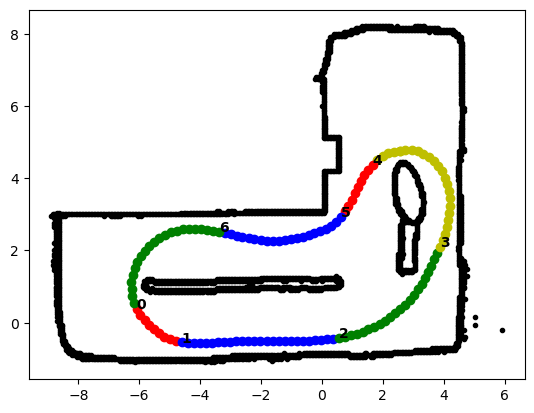

In [37]:
blackpts = np.argwhere(lobby_map <= 40).astype(np.float32)
blackpts[:, 0] = (lobby_map.shape[0] - blackpts[:, 0]) * resolution + origin[1]
blackpts[:, 1] = blackpts[:, 1] * resolution + origin[0]
colors = ['ro', 'bo', 'go', 'yo']
plt.plot(blackpts[:,1], blackpts[:,0], 'k.')
for i in range(len(seg_start_idx)-1):
    plt.plot(seg_waypoints[np.where(seg_waypoints[:,6] == i),0], seg_waypoints[np.where(seg_waypoints[:,6] == i),1], colors[i%4])
    plt.text(seg_waypoints[seg_start_idx[i], 0], seg_waypoints[seg_start_idx[i], 1], str(i), fontweight='bold')

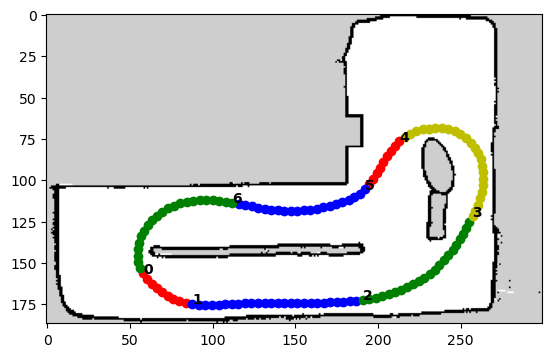

In [38]:
colors = ['ro', 'bo', 'go', 'yo']
plt.imshow(lobby_map, cmap='gray')
# plt.scatter((0-origin[0])/resolution, lobby_map.shape[0] - (0-origin[1])/resolution, c='r')
# plt.plot((seg_waypoints[:,0] - origin[0])/ resolution , lobby_map.shape[0]-(seg_waypoints[:,1] - origin[1]) / resolution , 'ro')
for i in range(len(seg_start_idx)-1):
    plt.plot((seg_waypoints[np.where(seg_waypoints[:,6] == i),0] - origin[0])/resolution, lobby_map.shape[0] - (seg_waypoints[np.where(seg_waypoints[:,6] == i),1] - origin[1]) /resolution, colors[i%4])
    plt.text((seg_waypoints[seg_start_idx[i], 0] - origin[0]) / resolution, lobby_map.shape[0] - (seg_waypoints[seg_start_idx[i], 1] - origin[1]) / resolution, str(i), fontweight='bold')

(-9.62999939918518, 6.650000810623169, -1.5650000631809236, 8.665000802278518)

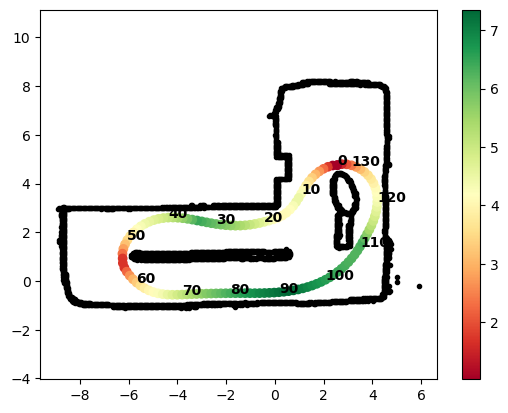

In [42]:
blackpts = np.argwhere(lobby_map <= 40).astype(np.float32)
blackpts[:, 0] = (lobby_map.shape[0] - blackpts[:, 0]) * resolution + origin[1]
blackpts[:, 1] = blackpts[:, 1] * resolution + origin[0]
colors = ['ro', 'bo', 'go', 'yo']
plt.plot(blackpts[:,1], blackpts[:,0], 'k.')
plt.scatter(seg_waypoints[:,0], seg_waypoints[:,1], c=seg_waypoints[:,2], cmap='RdYlGn')
for i in range(len(seg_waypoints)):
    if i % 10 == 0:
        plt.text(seg_waypoints[i, 0], seg_waypoints[i, 1], str(i), color='gray')
plt.colorbar()
plt.axis('equal')